# CODIGO DE ECUACIONES DIFERENCIALES

In [12]:
#librerias necesarias
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random as ra
%matplotlib inline

# Modelo SIR sin dinamica vital

El modelo SIR es uno de los modelos epidemiológicos más simples capaces de capturar muchas de las características típicas de los brotes epidémicos. El nombre del modelo proviene de las iniciales S (población susceptible), I (población infectada) y R (población recuperada). El modelo relaciona las variaciones de las tres poblaciones (Susceptible, Infectada y Recuperada) a través de la tasa de infección y el período infeccioso promedio.

$ \frac{dS}{dt} = -\frac{ \beta IS}{N} $

$ \frac{dI}{dt} = \frac{ \beta IS}{N} - \gamma I$

$ \frac{dR}{dt} = \gamma I $

# PROYECTO DE ECUACIONES DIFERENCIALES



#Importación de datos provenientes de la OMS

In [13]:
with open('deaths.txt', 'r') as data: 
    data = [i.split(",") for i in data]
confirmed=[];deaths=[];recovered=[]
for elemento in data:
    elemento[0]=float(elemento[0])
    deaths.append(elemento[0])
with open('confirmed.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    recovered.append(elemento[0])
print(len(data))
    
with open('recovered.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    confirmed.append(elemento[0])

NN=68135
C_=np.array(confirmed);R_=np.array(recovered);D_=np.array(deaths)
I_=abs(C_-R_)
S1=abs(NN-C_-D_)
S_=abs(NN-C_)
t_=np.linspace(0,160,len(recovered))

156


## primer metodo : ODEINT

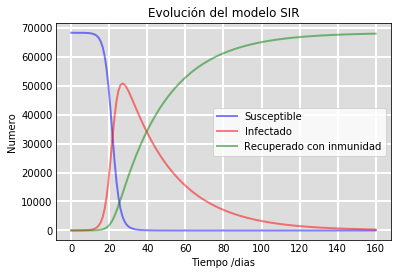

In [19]:
# Total popblación, N.
N = 68350
# numero inicial de infectados y recuperados, I0 y R0.
I0, R0 = 1, 0
# S0, es suceptible a las demás.
S0 = N - I0 - R0
# Rata de conatcto, beta, y tiempo de recuperación media, gamma, (en 1/days).
#beta=0.68
#gamma=1/20
beta=0.5549927022206926
gamma=0.039
#Arreglo de días
t = np.linspace(0, 160, 156)
TT=t
# Modelo SIR de equaciones diferenciales.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - (gamma) * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integración de las equaciones SIR, en el arreglo t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T
# Impresión de la data de manera separada S(t), I(t) y R(t)

#Graficación
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(TT, S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(TT, I, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(TT, R, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
ax.set_xlabel('Tiempo /dias')
ax.set_ylabel('Numero')
#ax.set_ylim(0,10)
plt.title("Evolución del modelo SIR")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend()


## Metodo de Runge

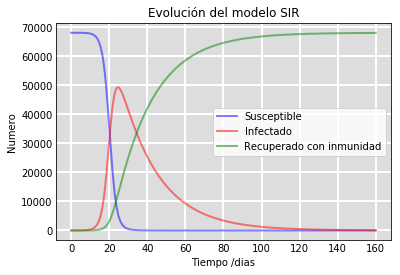

In [20]:
"Metodo de Runge de orden 1 o metodo de euler"
beta=1.2;gamma=0.0967
#  Población, N.
N = 68135
# Numero inicial de infectados y recuperados, I0 y R0.
I0=1; R0 =0
# S0, Suceptible a infección.
S0 = N - I0 - R0
y0=[R0,S0,I0];x0=0;xf=160
#Arreglo de tiempo
TT_=np.linspace(0,160,156)
#Ecuaciones del modelo SIR
def deriv(t,R,S,I):
    dS_dt= -beta*I*S/N
    dI_dt= beta*I*S/N - gamma*I
    dR_dt= gamma*I
    return np.array([dR_dt,dS_dt,dI_dt])
    
    
#Implemetnación de Runge Kutta
def Runge_kutta(x,xf,y0,n,f,v):
    h=(xf-x)/n
    y=y0
    k=np.zeros((4,len(y0)))
    for i in range(len(y0)):
        if i==0:
            k[0][0]=h*f(x,y[0],y[1],y[2])[0]
            k[0][1]=h*f(x,y[0],y[1],y[2])[1]
            k[0][2]=h*f(x,y[0],y[1],y[2])[2]
            
        elif "euler"!=v : 
            k[1][i]=f(x+h*0.5,y[0]+h*0.5*k[0][i],y[1]+h*0.5*k[1][i],y[2]+h*0.5*k[2][i])[0]
            k[2][i]=f(x+h*0.5,y[0]+h*0.5*k[0][i],y[1]+h*0.5*k[1][i],y[2]+h*0.5*k[2][i])[1]
            k[3][i]=f(x+h,y[0]+h*k[0][i],y[1]+h*k[1][i],y[2]+h*k[2][i])[2]
            
    for i in range(len(y0)):
        y[i]=y[i]+(k[0][i]+2*k[1][i]+2*k[2][i]+k[3][i])/6
    return np.array([y[0],y[1],y[2]])

e="euler"
r="runge"
Datos_R=[];Datos_S=[];Datos_I=[];n=200;h=0.8
for i in range(156):
    Datos_R.append((Runge_kutta(x0,xf,y0,n,deriv,e)[0]))
    Datos_S.append((Runge_kutta(x0,xf,y0,n,deriv,e)[1]))
    Datos_I.append((Runge_kutta(x0,xf,y0,n,deriv,e)[2]))
    y0=Runge_kutta(0,160,y0,n,deriv,e)

#Graficación
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(TT, Datos_S, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(TT, Datos_I, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(TT, Datos_R, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
ax.set_xlabel('Tiempo /dias')
ax.set_ylabel('Numero')
#ax.set_ylim(0,10)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
plt.title("Evolución del modelo SIR")
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend()


## Metodo Runge de orden 4

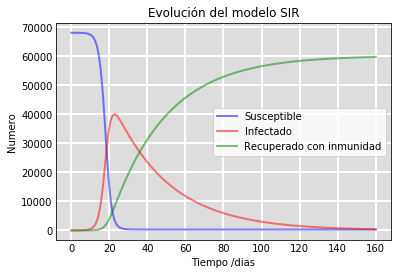

In [21]:
"Metodo de Runge de orden 4"

def deriv(t,R,S,I):
    dS_dt= -beta*I*S/N
    dI_dt= beta*I*S/N - gamma*I
    dR_dt= gamma*I
    return np.array([dR_dt,dS_dt,dI_dt])
# población total, N.
N = 68135
beta=0.12;gamma=0.006
# Numero inicial de infectados y recuperados, I0 y R0.
I0=1; R0 =0
# S0, Suceptible a infección.
y0=[R0,S0,I0]
xf=160;x0=0;m=156
h=0.001
Datos_R2=[];Datos_S2=[];Datos_I2=[];n=15
for i in range(m):
    Datos_R2.append((Runge_kutta(x0,xf,y0,n,deriv,r)[0]))
    Datos_S2.append((Runge_kutta(x0,xf,y0,n,deriv,r)[1]))
    Datos_I2.append((Runge_kutta(x0,xf,y0,n,deriv,r)[2]))
    y0=Runge_kutta(x0,xf,y0,n,deriv,r)
#Arreglo de tiempo
TT=np.linspace(x0,xf,m)

#Graficación 
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(TT, Datos_S2, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(TT, Datos_I2, 'r', alpha=0.5, lw=2, label='Infectado')
ax.plot(TT, Datos_R2, 'g', alpha=0.5, lw=2, label='Recuperado con inmunidad')
ax.set_xlabel('Tiempo /dias')
ax.set_ylabel('Numero')
#ax.set_ylim(0,1)
#ax.set_ylim(0,1.6)
plt.title("Evolución del modelo SIR")
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.legend()

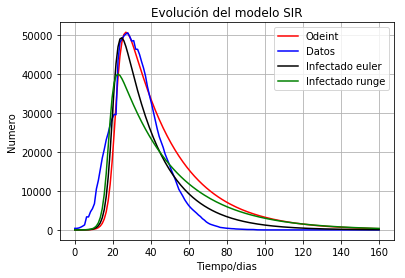

1.4230582108222887 Numero reproductivo


In [22]:
R=0.5549927022206926/0.39
plt.figure(2)
plt.title("Evolución del modelo SIR")
plt.plot(TT,I,"red",label="Odeint")
plt.plot(TT,(I_-D_),"blue",label="Datos")    
plt.plot(TT, Datos_I,"black",label='Infectado euler')
plt.plot(TT, Datos_I2,"green",label='Infectado runge')    
plt.xlabel("Tiempo/dias")
plt.ylabel("Numero")
plt.grid()
plt.legend()
plt.show()
print(R,"Numero reproductivo")

# Super ajuste HKM

In [23]:
with open('deaths.txt', 'r') as data: 
    data = [i.split(",") for i in data]
confirmed=[];deaths=[];recovered=[]
for elemento in data:
    elemento[0]=float(elemento[0])
    deaths.append(elemento[0])
print(len(data))    
with open('confirmed.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    recovered.append(elemento[0])
print(len(data))
    
with open('recovered.txt', 'r') as data: 
    data = [i.split(",") for i in data]    
for elemento in data:
    elemento[0]=float(elemento[0])
    confirmed.append(elemento[0])

NN=68135
C_=np.array(confirmed);R_=np.array(recovered);D_=np.array(deaths)
I_=abs(C_-R_)-D_
S1=abs(NN-C_-D_)
S_=abs(NN-C_)
t_=np.linspace(0,160,len(recovered))


156
156


# Ajuste de los datos de Wuhan para el modelo SIR

In [24]:
#Función de ajuste
#Infectados
I_=abs(C_-R_)

#Funcion a ajustar
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

y0=S0,I0,R0
def Chisquare(Datos_t,Datos_x,m,I1,I2): 
    #Constantes del sistema
    N=len(Datos_t)
    #Limites de los valores en los cuales vamos a buscar las constantes
    a=I1[0];b=I1[1];c=I2[0];d=I2[1]
    resul=[];k=[];tt=0
    minimo=10000000
    tt1=0
    while  tt1<m:
        beta=ra.uniform(a,b)
        tt2=0
        
        while  tt2<m:
           
            suma=0  
            gamma=ra.uniform(c,d)
            ret = odeint(deriv, y0, t, args=(N, beta, gamma))
            S, I, R = ret.T
            for i in range(N):
                
                suma+=((Datos_x[i]-I[i])**2)/I[i]
                
            resul.append(suma)
            for i in range(len(resul)):
                if  minimo>abs(resul[i]):
                    k=[beta,gamma]
                    minimo=resul[i]
                   
                
            
            tt2+=1
        tt1+=1
    print("Constantes beta y gamma")
    print(k,minimo)
    
    return k
I_1=[0.2,1.2];I_2=[0.03,0.09]
Chisquare(t_,I_,60,I_1,I_2)

Constantes beta y gamma
[0.4452053322133432, 0.030011452843900874] 1725536.2416260778


[0.4452053322133432, 0.030011452843900874]

# Comparación de los métodos de Euler y Runge Kutta 4

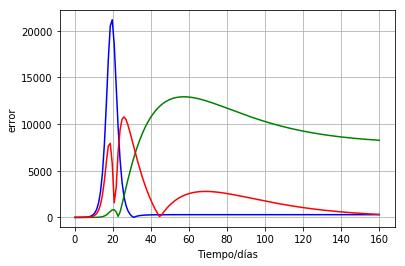

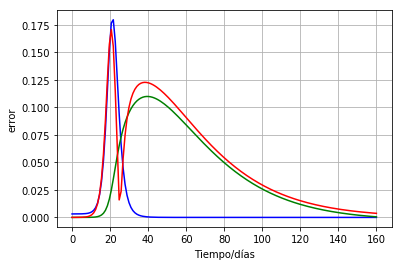

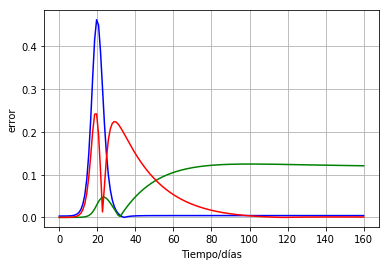

In [25]:
# Relative error Euler and Runge kutta
t=TT
ES = np.abs([m - n for m,n in zip(Datos_S,Datos_S2)])
EI = np.abs([m - n for m,n in zip(Datos_I,Datos_I2)])
ER = np.abs([m - n for m,n in zip(Datos_R,Datos_R2)])

plt.plot(t,ES,'b')
plt.plot(t,ER,'g')
plt.plot(t,EI,'r')
plt.xlabel("Tiempo/días")
plt.ylabel("error")
plt.grid()
plt.show()

# Relative error Euler and Odeint

ES1 = np.abs((Datos_S-ret[:, 0]))
EI1 = np.abs((Datos_I-ret[:, 1]))
ER1 = np.abs((Datos_R-ret[:, 2]))

plt.plot(t,ES1/N,'b')
plt.plot(t,ER1/N,'g')
plt.plot(t,EI1/N,'r')
plt.xlabel("Tiempo/días")
plt.ylabel("error")
plt.grid()
plt.show()

# Relative error Runge kutta and Odeint

ES2 = np.abs((Datos_S2-ret[:, 0]))
EI2 = np.abs((Datos_I2-ret[:, 1]))
ER2 = np.abs((Datos_R2-ret[:, 2]))

plt.plot(t,ES2/N,'b')
plt.plot(t,ER2/N,'g')
plt.plot(t,EI2/N,'r')
plt.grid()
plt.xlabel("Tiempo/días")
plt.ylabel("error")
plt.show()

#plt.plot(t,Datos_Ie,'o',color='r')
#plt.plot(t,Datos_I,'o',color='black')
#plt.plot(t, ret[:, 1]/N, 'o',color='b')
#plt.xlim(50,51)
#plt.ylim(6.1,6.75)
#plt.grid()
#plt.show()    


# Comportamiento del sistema con respecto a los parámetros del sistema

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


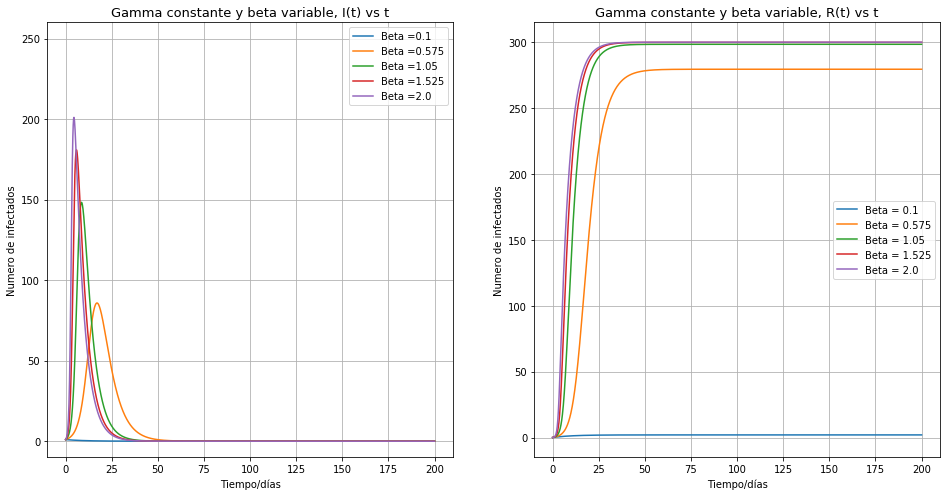

In [26]:
# Parameters
N = 300
beta = 0.3
gama = 0.2
beta1 = np.linspace(0.1,2,5)


# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1, 0] # condiciones iniciales

t = np.linspace(0, 200, 2000) # Step


plt.figure(figsize=(16,8))
for i in beta1:
    ret = odeint(f, y0, t, args=(N,i,gama)) # Solution
    plt.subplot(121)
    plt.title("Gamma constante y beta variable, I(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 1], label='Beta =%s'%i)
    plt.ylim(-10,260)
    plt.xlabel("Tiempo/días")
    plt.ylabel("Numero de infectados")
    plt.grid()
    plt.legend()
    
    plt.subplot(122)
    plt.title("Gamma constante y beta variable, R(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 2], label='Beta = %s'%i)
    plt.xlabel("Tiempo/días")
    plt.ylabel("Numero de infectados")
    plt.legend()
    plt.grid()


plt.show()
    

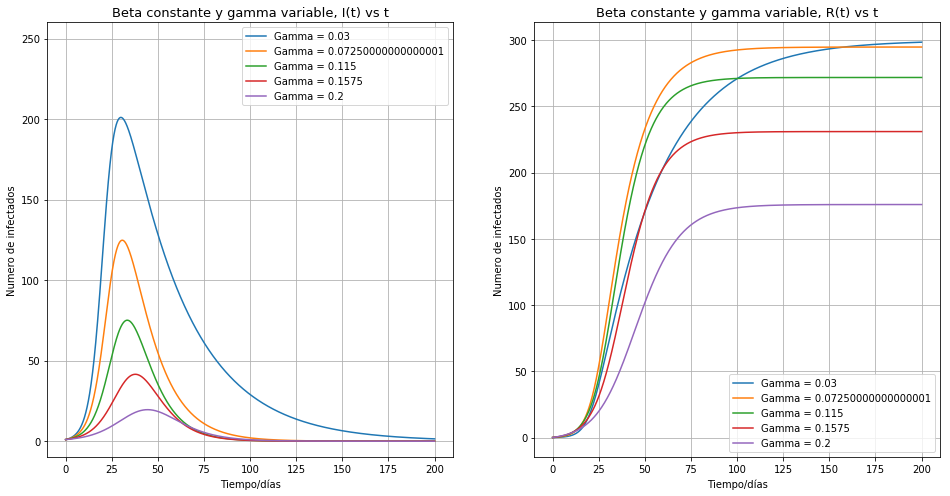

In [27]:
#Analogamente para gama
N=300
gama1 = np.linspace(0.03,0.2,5)

# Odeint method
def f(y, t, N, beta, gama):
    S1, I1, R1 = y
    dydt = [-beta*S1*I1/N,(beta*S1*I1/N) - gama*I1, gama*I1]
    return dydt

y0 = [299, 1,0] # Initial conditions

t = np.linspace(0, 200, 2000) # Step

plt.figure(figsize=(16,8))
for i in gama1:
    ret = odeint(f, y0, t, args=(N,beta,i)) # Solution
    plt.subplot(121)
    plt.title("Beta constante y gamma variable, I(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 1], label='Gamma = %s'%i)
    plt.ylim(-10,260)
    plt.grid()
    plt.xlabel("Tiempo/días")
    plt.ylabel("Numero de infectados")
    plt.legend()
    
    plt.subplot(122)
    plt.title("Beta constante y gamma variable, R(t) vs t",fontsize=13)
    plt.plot(t,ret[:, 2], label='Gamma = %s'%i)
    plt.xlabel("Tiempo/días")
    plt.ylabel("Numero de infectados")
    plt.legend()
    plt.grid()

# Modelo SIR con dinamica vital

$ \frac{dS}{dt} = \Lambda - \mu S -\frac{ \beta IS}{N} $

$ \frac{dI}{dt} = \frac{ \beta IS}{N} - \gamma I - \mu I$

$ \frac{dR}{dt} = \gamma I - \mu R$